## Observer pattern

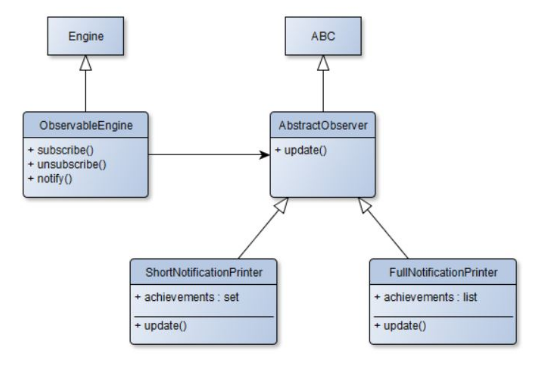

In [19]:
from abc import ABC, abstractmethod

class ObservableEngine: # Наблюдаемая система
    def __init__(self): 
        self.__subscribers = set() # При инициализации множество подписчиков задается пустым
    
    def subscribe(self, subscriber):
        self.__subscribers.add(subscriber) # Для того чтобы подписать пользователя, он добавляется во множество подписчиков
        
    def unsubscribe(self, subscriber):
        self.__subscribers.remove(subscriber) # Удаление подписчика из списка
        
    def notify(self, message):
        for subscriber in self.__subscribers:
            subscriber.update(message) # Отправка уведомления всем подписчикам
            

class AbstractObserver(ABC):
    @abstractmethod
    def update(self, message): # Абстрактный наблюдатель задает метод update 
        pass

    
class ShortNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = set()
    
    def update(self, message): # Конкретная реализация метода update
        self.achievements.add(message['title'])
        #print(f'Получено коротокое сообщение {message}')

        
class FullNotificationPrinter(AbstractObserver):
    def __init__(self):
        self.achievements = []
    
    def update(self, message): # Конкретная реализация метода update
        if message not in self.achievements:
            self.achievements.append(message)
        #print(f'Получено длинное сообщение {message}')

In [20]:
manager = ObservableEngine()
printer1 = ShortNotificationPrinter()
printer2 = FullNotificationPrinter()
printer3 = FullNotificationPrinter()

In [21]:
manager.subscribe(printer1)
manager.subscribe(printer2)

In [22]:
manager.notify({'title': 'Jopa', 'message': 'Потому что ты жопа'})

In [23]:
printer1.achievements

{'Jopa'}